In [1]:
from GmGM.synthetic import DatasetGenerator, PrecMatGenerator, PrecMatErdosRenyiGilbert
from GmGM import GmGM
from TeraLasso import TeraLasso
from EiGLasso import EiGLasso

import timeit
from statistics import median
import numpy as np
import matplotlib.pyplot as plt

In [2]:
linestyles = ['-', '--', '-.', ':']

In [3]:
def generate_timing_data_smart(
    algorithms: dict[str, callable],
    sizes: list[int],
    K: int,
    attempts: int, 
    cutoff: int = 60,
    verbose: bool = False
):  
    includes: dict[str, bool] = {}
    times: dict[str, list[float]] = {}
    
    for algorithm in algorithms:
        includes[algorithm]: bool = True
        times[algorithm]: list[float] = []
    for d in sizes:
        if not any(includes.values()):
            if verbose:
                print("All algorithms timed out")
            break
        if verbose:
            print(f"Starting {(d,) * K}")

        # Generate Data
        structure = {
            "dataset_0": tuple(f"axis_{j}" for j in range(K))
        }
        sub_generators = {
            f"axis_{i}": PrecMatGenerator(
                core_type="coreless",
                mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
            )
            for i in range(K)
        }
        generator = DatasetGenerator(
            structure=structure,
            generator=sub_generators,
            size={axis: d for axis in structure["dataset_0"]},
        )
        generator.reroll_Psis()
        dataset = generator.generate({"dataset_0": 1})

        # Test algorithms
        for algorithm in algorithms.keys():
            if not includes[algorithm]:
                continue
            times[algorithm].append(0)
            durations = timeit.Timer(
                lambda: algorithms[algorithm](dataset.deepcopy())
            ).repeat(
                repeat=attempts,
                number=1
            )
            times[algorithm][-1] = median(durations)
            if times[algorithm][-1] >= cutoff:
                if verbose:
                    print(f"{algorithm} ran for longer than {cutoff} seconds")
                    print(f"{algorithm} is no longer being tracked")
                includes[algorithm] = False
            else:
                if verbose:
                    print(f"\t{algorithm}: {times[algorithm][-1]} Seconds")
    print("Done")
    return times

## 2-Axis Runtimes

In [4]:
algorithms = {
    "GmGM": lambda dataset: GmGM(dataset, to_keep=10),
    "GmGM-50pc": lambda dataset: GmGM(dataset, to_keep=10, n_comps=50),
    "TeraLasso": lambda dataset: TeraLasso(dataset, 0),
    "EiGLasso": lambda dataset: EiGLasso(dataset, 0, 0),
}
size_data_2 = [
    # EiGLasso
    100, 125, 150, 175, 200, 225, 250, 275,
    # TeraLasso
    300, 400, 500,
    # GmGM
    600, 700, 800, 900, 1000,
    1100, 1200, 1300, 1400, 1500,
    1750, 2000, 2250, 2500,
    3000, 3500, 4000, 4500, 5000,
    # GmGM-50pc
    6000, 7000, 8000, 9000, 10000,
    11000
]
timing_data_2 = generate_timing_data_smart(
    algorithms=algorithms,
    sizes=size_data_2,
    K=2,
    attempts=1,
    verbose=True
)

Starting (100, 100)
	GmGM: 0.8917587079999993 Seconds
	GmGM-50pc: 0.6944849580000003 Seconds
	TeraLasso: 2.3102241250000013 Seconds
	EiGLasso: 7.973114291000002 Seconds
Starting (125, 125)
	GmGM: 0.09746312499999732 Seconds
	GmGM-50pc: 0.27136537499999847 Seconds
	TeraLasso: 3.0264173330000013 Seconds
	EiGLasso: 11.940035917 Seconds
Starting (150, 150)
	GmGM: 0.0868427499999953 Seconds
	GmGM-50pc: 0.31971545799999745 Seconds
	TeraLasso: 5.35577275 Seconds
	EiGLasso: 18.786394082999998 Seconds
Starting (175, 175)
	GmGM: 0.07932875000000195 Seconds
	GmGM-50pc: 0.30184358399999667 Seconds
	TeraLasso: 6.698944249999997 Seconds
	EiGLasso: 25.929258583000006 Seconds
Starting (200, 200)
	GmGM: 0.1864735000000053 Seconds
	GmGM-50pc: 0.2791076660000016 Seconds
	TeraLasso: 8.862643958000007 Seconds
	EiGLasso: 34.194143 Seconds
Starting (225, 225)
	GmGM: 0.1992556659999991 Seconds
	GmGM-50pc: 0.31346424999998135 Seconds
	TeraLasso: 11.711172458000021 Seconds
	EiGLasso: 43.98846508400001 Seconds
S

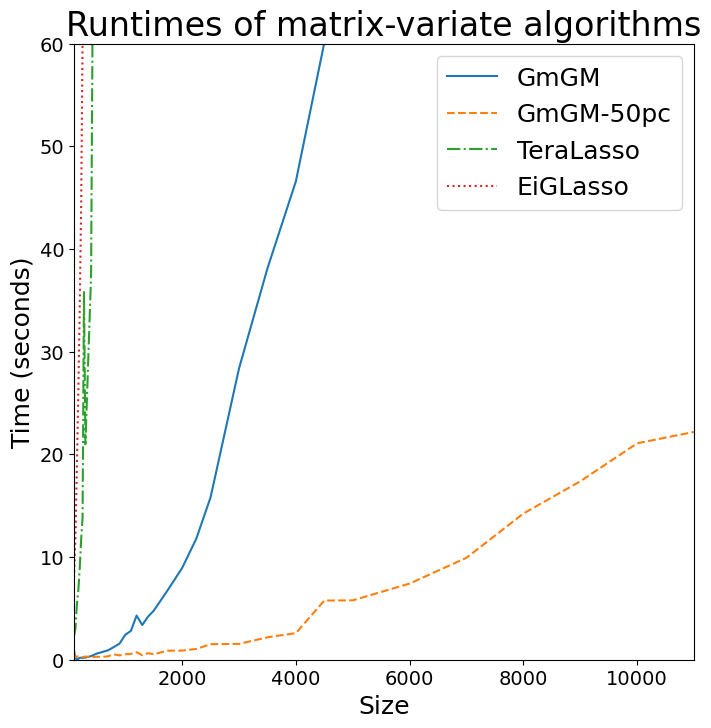

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
for idx, algorithm in enumerate(timing_data_2):
    ax.plot(
        size_data_2[:len(timing_data_2[algorithm])],
        timing_data_2[algorithm],
        label=algorithm,
        linestyle=linestyles[idx % len(linestyles)]
    )
ax.set_xlabel("Size", fontsize=18)
ax.set_ylabel("Time (seconds)", fontsize=18)
ax.set_title(f"Runtimes of matrix-variate algorithms", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.set_ylim([0, 60])
ax.set_xlim([size_data_2[0], size_data_2[-1]])
ax.legend(fontsize=18)

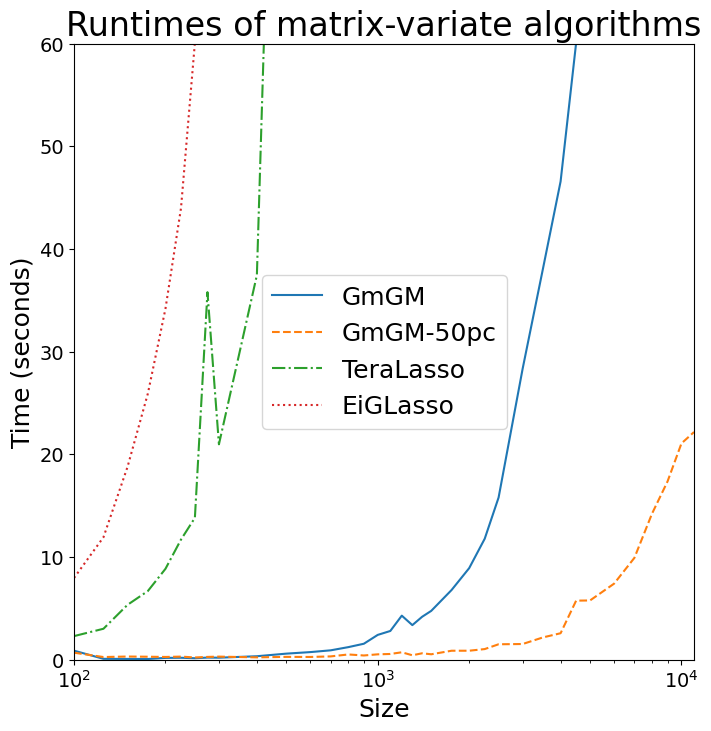

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
for idx, algorithm in enumerate(timing_data_2):
    ax.plot(
        size_data_2[:len(timing_data_2[algorithm])],
        timing_data_2[algorithm],
        label=algorithm,
        linestyle=linestyles[idx % len(linestyles)]
    )
ax.set_xlabel("Size", fontsize=18)
ax.set_ylabel("Time (seconds)", fontsize=18)
ax.set_title(f"Runtimes of matrix-variate algorithms", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.set_ylim([0, 60])
ax.set_xlim([size_data_2[0], size_data_2[-1]])
ax.set_xscale('log')
ax.legend(fontsize=18)

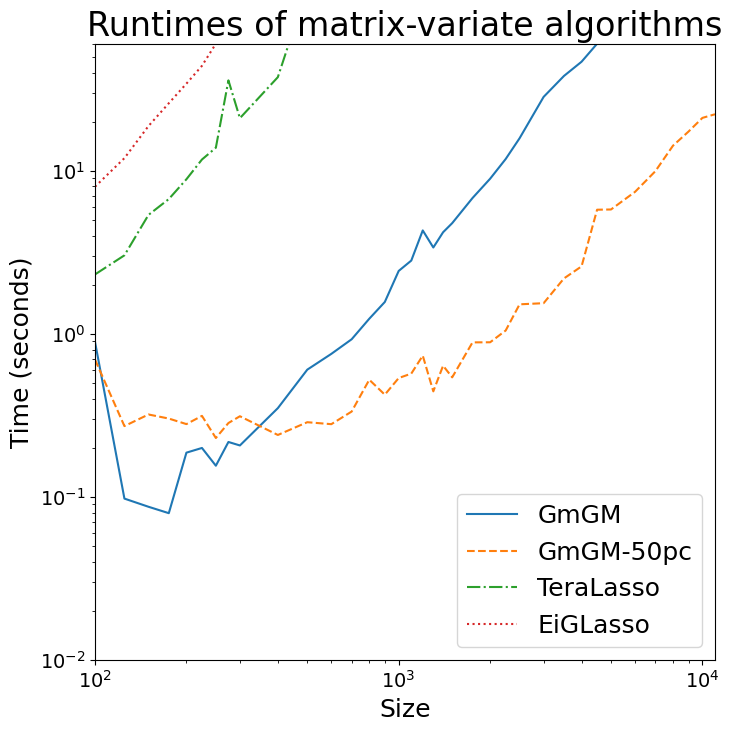

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))
for idx, algorithm in enumerate(timing_data_2):
    ax.plot(
        size_data_2[:len(timing_data_2[algorithm])],
        timing_data_2[algorithm],
        label=algorithm,
        linestyle=linestyles[idx % len(linestyles)]
    )
ax.set_xlabel("Size", fontsize=18)
ax.set_ylabel("Time (seconds)", fontsize=18)
ax.set_title(f"Runtimes of matrix-variate algorithms", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.set_ylim([0.01, 60])
ax.set_xlim([size_data_2[0], size_data_2[-1]])
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(fontsize=18)

## 3-Axis Runtimes

In [11]:
algorithms = {
    "GmGM": lambda dataset: GmGM(dataset, to_keep=10),
    "GmGM-50pc": lambda dataset: GmGM(dataset, to_keep=10, n_comps=50),
    "TeraLasso": lambda dataset: TeraLasso(dataset, 0),
}
size_data_3 = [
    50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150,
    160, 170, 180, 190, 200, 250, 300, 350, 400, 450, 500
]
timing_data_3 = generate_timing_data_smart(
    algorithms=algorithms,
    sizes=size_data_3,
    K=3,
    attempts=1,
    verbose=True
)

Starting (50, 50, 50)
	GmGM: 0.28653791700025977 Seconds
	GmGM-50pc: 0.42010366700014856 Seconds
	TeraLasso: 0.6547868749998997 Seconds
Starting (60, 60, 60)
	GmGM: 0.35446637499990175 Seconds
	GmGM-50pc: 0.5578703329997552 Seconds
	TeraLasso: 0.9322900410002148 Seconds
Starting (70, 70, 70)
	GmGM: 0.5522024580000107 Seconds
	GmGM-50pc: 0.9062538339999264 Seconds
	TeraLasso: 1.4686080840001523 Seconds
Starting (80, 80, 80)
	GmGM: 0.7369390000003477 Seconds
	GmGM-50pc: 0.8446031660000699 Seconds
	TeraLasso: 1.824955958999908 Seconds
Starting (90, 90, 90)
	GmGM: 1.0234410830003071 Seconds
	GmGM-50pc: 1.1789004999995996 Seconds
	TeraLasso: 2.613993541000127 Seconds
Starting (100, 100, 100)
	GmGM: 1.381987874999595 Seconds
	GmGM-50pc: 1.2793197500000133 Seconds
	TeraLasso: 3.7516876250001587 Seconds
Starting (110, 110, 110)
	GmGM: 1.803542667000329 Seconds
	GmGM-50pc: 2.0944363749999866 Seconds
	TeraLasso: 3.9921709579998605 Seconds
Starting (120, 120, 120)
	GmGM: 2.246987459000138 Seconds

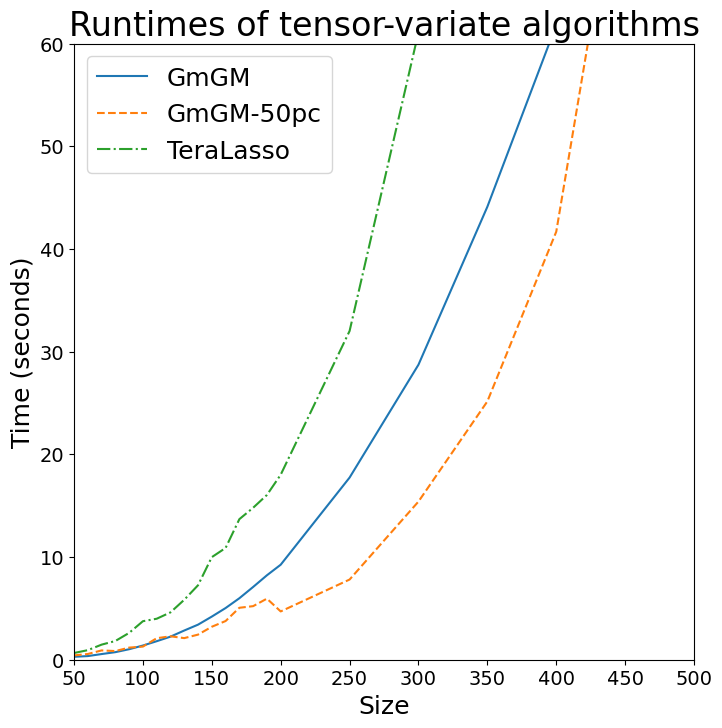

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
for idx, algorithm in enumerate(timing_data_3):
    ax.plot(
        size_data_3[:len(timing_data_3[algorithm])],
        timing_data_3[algorithm],
        label=algorithm,
        linestyle=linestyles[idx % len(linestyles)]
    )
ax.set_xlabel("Size", fontsize=18)
ax.set_ylabel("Time (seconds)", fontsize=18)
ax.set_title(f"Runtimes of tensor-variate algorithms", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.set_ylim([0, 60])
ax.set_xlim([size_data_3[0], size_data_3[-1]])
ax.legend(fontsize=18)

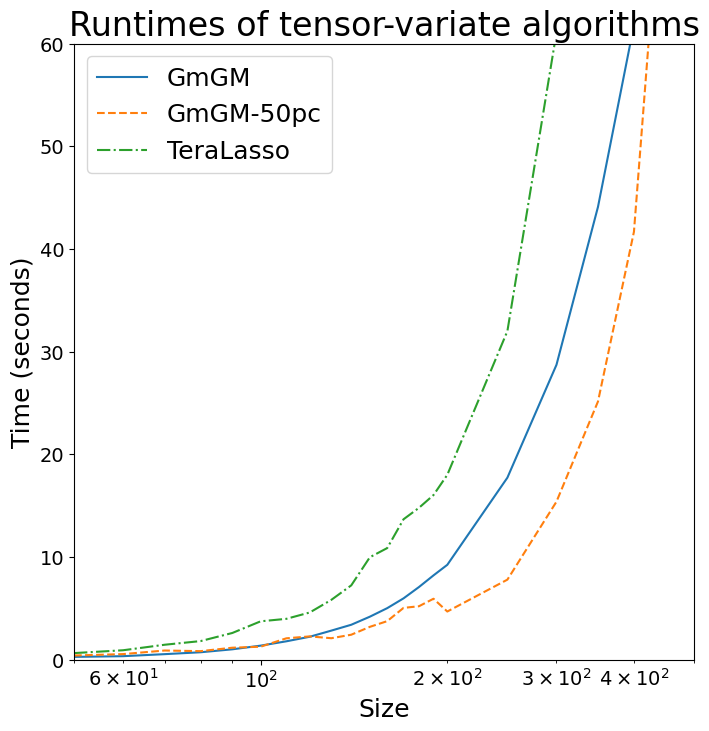

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))
for idx, algorithm in enumerate(timing_data_3):
    ax.plot(
        size_data_3[:len(timing_data_3[algorithm])],
        timing_data_3[algorithm],
        label=algorithm,
        linestyle=linestyles[idx % len(linestyles)]
    )
ax.set_xlabel("Size", fontsize=18)
ax.set_ylabel("Time (seconds)", fontsize=18)
ax.set_title(f"Runtimes of tensor-variate algorithms", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.set_ylim([0, 60])
ax.set_xlim([size_data_3[0], size_data_3[-1]])
ax.set_xscale('log')
ax.legend(fontsize=18)

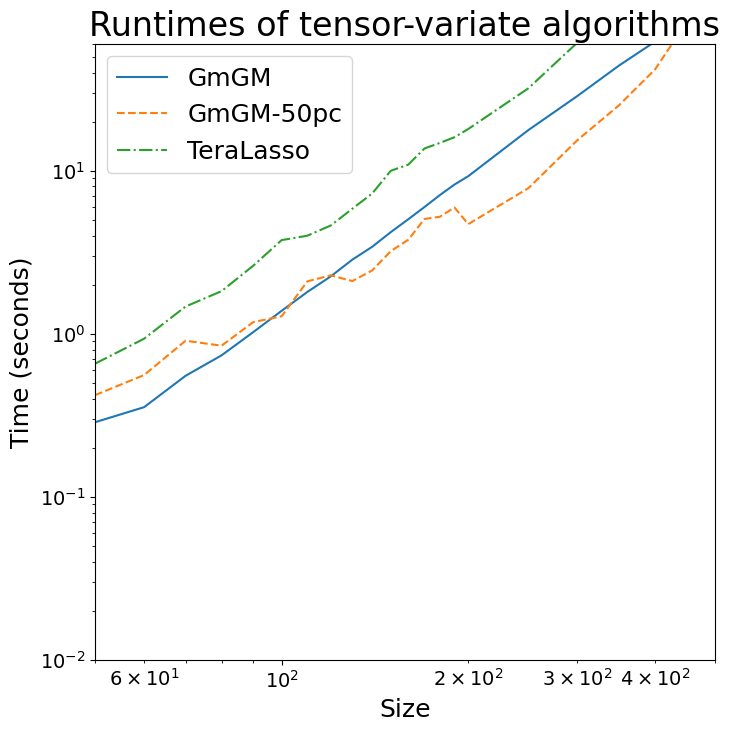

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
for idx, algorithm in enumerate(timing_data_3):
    ax.plot(
        size_data_3[:len(timing_data_3[algorithm])],
        timing_data_3[algorithm],
        label=algorithm,
        linestyle=linestyles[idx % len(linestyles)]
    )
ax.set_xlabel("Size", fontsize=18)
ax.set_ylabel("Time (seconds)", fontsize=18)
ax.set_title(f"Runtimes of tensor-variate algorithms", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.set_ylim([0.01, 60])
ax.set_xlim([size_data_3[0], size_data_3[-1]])
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(fontsize=18)

## 4-Axis Runtimes

In [14]:
algorithms = {
    "GmGM": lambda dataset: GmGM(dataset, to_keep=10),
    "GmGM-50pc": lambda dataset: GmGM(dataset, to_keep=10, n_comps=50),
    "TeraLasso": lambda dataset: TeraLasso(dataset, 0),
}
size_data_4 = [
    20, 30, 40, 50, 60, 70, 80, 90, 100
]
timing_data_4 = generate_timing_data_smart(
    algorithms=algorithms,
    sizes=size_data_4,
    K=4,
    attempts=1,
    verbose=True
)

Starting (20, 20, 20, 20)
	GmGM: 0.8975894590003008 Seconds
	GmGM-50pc: 0.42086187499990046 Seconds
	TeraLasso: 0.49471941699994204 Seconds
Starting (30, 30, 30, 30)
	GmGM: 0.8212640839997221 Seconds
	GmGM-50pc: 1.3889840420001747 Seconds
	TeraLasso: 1.3026248749997649 Seconds
Starting (40, 40, 40, 40)
	GmGM: 1.2517269999998462 Seconds
	GmGM-50pc: 3.180893707999985 Seconds
	TeraLasso: 3.534443458000169 Seconds
Starting (50, 50, 50, 50)
	GmGM: 0.8173305420000361 Seconds
	GmGM-50pc: 8.10476079199998 Seconds
	TeraLasso: 10.206982042000163 Seconds
Starting (60, 60, 60, 60)
	GmGM: 1.583818084000086 Seconds
	GmGM-50pc: 13.465830250000181 Seconds
	TeraLasso: 19.380963709000298 Seconds
Starting (70, 70, 70, 70)
	GmGM: 3.023403749999943 Seconds
	GmGM-50pc: 24.366338832999645 Seconds
	TeraLasso: 51.03413233299989 Seconds
Starting (80, 80, 80, 80)
	GmGM: 5.022907208000106 Seconds
	GmGM-50pc: 59.687822791000144 Seconds
TeraLasso ran for longer than 60 seconds
TeraLasso is no longer being tracked
S

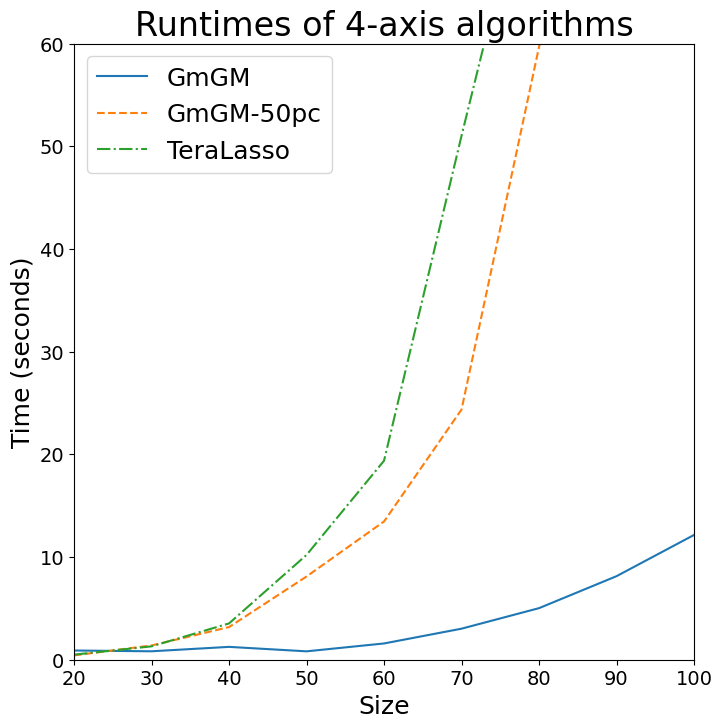

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
for idx, algorithm in enumerate(timing_data_4):
    ax.plot(
        size_data_4[:len(timing_data_4[algorithm])],
        timing_data_4[algorithm],
        label=algorithm,
        linestyle=linestyles[idx % len(linestyles)]
    )
ax.set_xlabel("Size", fontsize=18)
ax.set_ylabel("Time (seconds)", fontsize=18)
ax.set_title(f"Runtimes of 4-axis algorithms", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.set_ylim([0, 60])
ax.set_xlim([size_data_4[0], size_data_4[-1]])
ax.legend(fontsize=18)

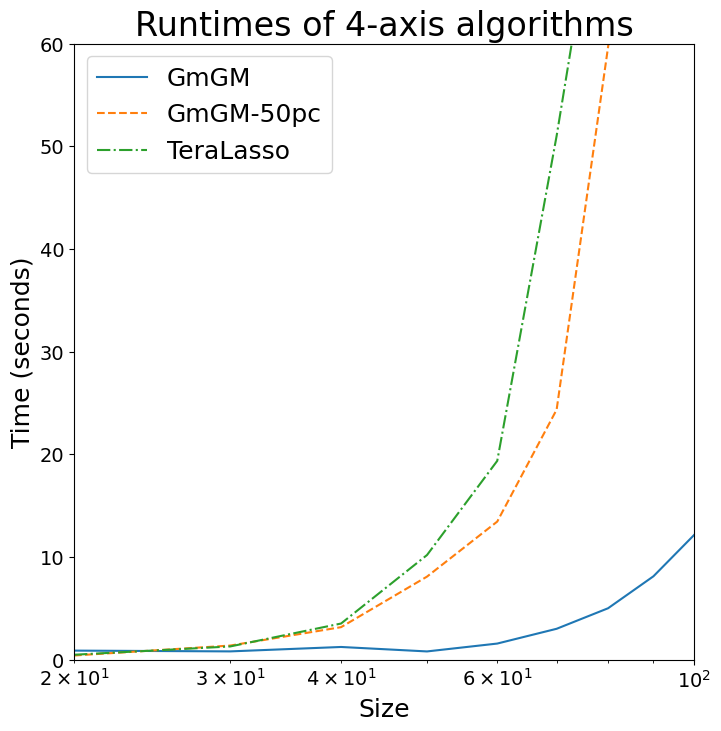

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
for idx, algorithm in enumerate(timing_data_4):
    ax.plot(
        size_data_4[:len(timing_data_4[algorithm])],
        timing_data_4[algorithm],
        label=algorithm,
        linestyle=linestyles[idx % len(linestyles)]
    )
ax.set_xlabel("Size", fontsize=18)
ax.set_ylabel("Time (seconds)", fontsize=18)
ax.set_title(f"Runtimes of 4-axis algorithms", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.set_ylim([0, 60])
ax.set_xlim([size_data_4[0], size_data_4[-1]])
ax.set_xscale('log')
ax.legend(fontsize=18)

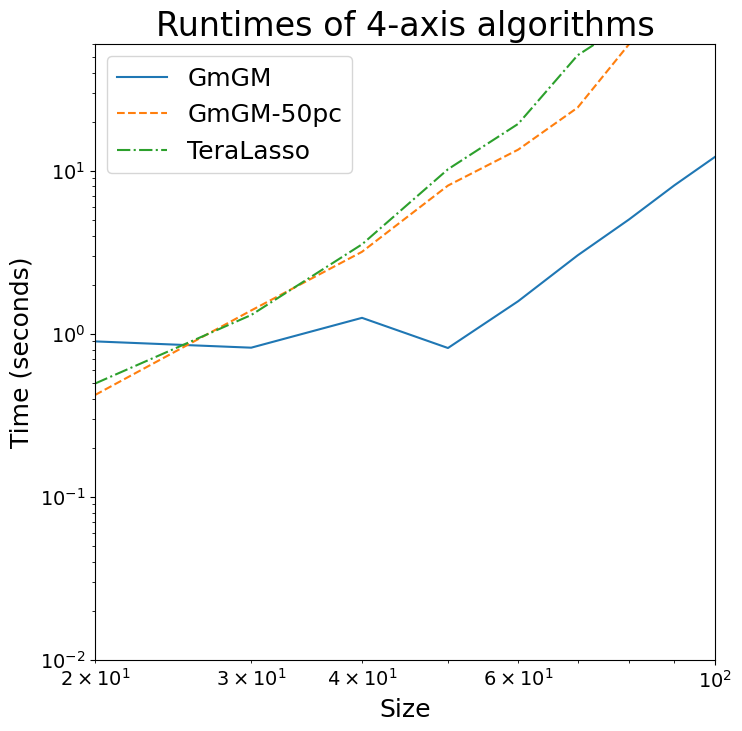

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))
for idx, algorithm in enumerate(timing_data_4):
    ax.plot(
        size_data_4[:len(timing_data_4[algorithm])],
        timing_data_4[algorithm],
        label=algorithm,
        linestyle=linestyles[idx % len(linestyles)]
    )
ax.set_xlabel("Size", fontsize=18)
ax.set_ylabel("Time (seconds)", fontsize=18)
ax.set_title(f"Runtimes of 4-axis algorithms", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.set_ylim([0.01, 60])
ax.set_xlim([size_data_4[0], size_data_4[-1]])
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(fontsize=18)